In [40]:
pip install -U fortran-magic


In [41]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [42]:
#ejemplo 1
s = [1,"diez",2.0,"veinte",3,"treinta"]
s


[1, 'diez', 2.0, 'veinte', 3, 'treinta']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [43]:
#ejemplo 2
# Lists can be indexed like C-style arrays.
first = s[3]
second = s[2]
print("veinte:", first)
print("segundo:", second)

veinte: veinte
segundo: 2.0


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [44]:
#ejemplo 3
# Negative indexing gives elements relative to the end of the list.
last = s[-1]
penultimate = s[-2]
print("last:", last)
print("second to last:", penultimate)

last: treinta
second to last: 3


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [45]:
#ejemplo 4
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = s[1:4]
sublist

['diez', 2.0, 'veinte']

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [46]:
#ejemplo 5
# l[:N] is equivalent to l[0:N].
first_three = s[:-1]
first_three

[1, 'diez', 2.0, 'veinte', 3]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [47]:
#ejemplo 6
# l[3:] is equivalent to l[3:len(l)].
after_three = s[2:]
after_three

[2.0, 'veinte', 3, 'treinta']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [48]:
#ejemplo 7
# There's also a third parameter, "step", which gets every Nth element.
s = ['1', '2', 'c', 'd', 'l', '5', 'g','7']
s[1:7:2]

['2', 'd', '5']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [49]:
#ejemplo 8
# This is a cute way to reverse a list.
s[::-1]

['7', 'g', '5', 'l', 'd', 'c', '2', '1']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [50]:
#ejemplo 9
# Lists can be grown efficiently (in O(1) amortized time).
p = [10, 2, 35, 4.2, 56]
print("Before:", p)
p.append('six')
print("After:", p)

Before: [10, 2, 35, 4.2, 56]
After: [10, 2, 35, 4.2, 56, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [51]:
#ejemplo 10
# Comprehensions let us perform elementwise computations.
m = [12, 62, 23, 34, 75]
[x * 2 for x in m]

[24, 124, 46, 68, 150]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [52]:

#ejemplo 11
# Dictionaries are key-value mappings.
universidades = {'nacional': 'unal', 'pedagogica': 'UPC', 'distrital': 'distri'}
universidades

{'distrital': 'distri', 'nacional': 'unal', 'pedagogica': 'UPC'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [53]:
#ejemplo 12
# Like lists, dictionaries are size-mutable.
universidades['andes'] = 'uniandes'
universidades

{'andes': 'uniandes',
 'distrital': 'distri',
 'nacional': 'unal',
 'pedagogica': 'UPC'}

In [ ]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [54]:
#ejemplo 13
del universidades['andes']
universidades

{'distrital': 'distri', 'nacional': 'unal', 'pedagogica': 'UPC'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

In [55]:
#ejemplo 14
# No slicing.
universidades['distrital':'nacional']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [56]:
#ejemplo 15
# Suppose we have some matrices...
C = [[20, 1.2, 3.6],
     [21, 35, 4.6],
     [58, 62, 71],
     [11, 1.5, 1.6]]

D = [[5.1, 26, 38, 41],
     [21, 3.2, 4.8, 51]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [59]:
#ejemplo 16
def matmul(C, D):
    """Multiply matrix C by matrix D."""
    rows_out = len(C)
    cols_out = len(D[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(D)):
                out[i][j] += C[i][k] * D[k][j]
    return out

<center><img src="images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 45 µs, sys: 0 ns, total: 45 µs
Wall time: 63.2 µs


[[127.2, 523.84, 765.76, 881.2],
 [842.1, 658.0, 966.0, 2646],
 [1597.8, 1706.4, 2501.6, 5540],
 [87.6, 290.8, 425.2, 527.5]]

In [60]:
#ejemplo 17
%%time

matmul(C, D)

CPU times: user 44 µs, sys: 0 ns, total: 44 µs
Wall time: 47.9 µs


[[127.2, 523.84, 765.76, 881.2],
 [842.1, 658.0, 966.0, 2646],
 [1597.8, 1706.4, 2501.6, 5540],
 [87.6, 290.8, 425.2, 527.5]]

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

In [61]:
#ejemplo 18
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.23857287471746935, 0.48866884587093484, 0.41691147555606967],
 [0.9983739599573809, 0.9514250617564013, 0.42258404420453877]]

In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

In [62]:
#ejemplo 19
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 10.6 s, sys: 4.72 ms, total: 10.6 s
Wall time: 10.6 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [63]:
#ejemplo 20
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xp, yp):
    return sum(x * y for x, y in zip(xp, yp))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [64]:
#ejemplo 21
%%fortran
subroutine fortran_dot_product(xp, yp, result)
    double precision, intent(in) :: xp(:)
    double precision, intent(in) :: yp(:)
    double precision, intent(out) :: result
    
    result = sum(xp * yp)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [65]:
#ejemplo 22
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

In [66]:
#ejemplo 23
%%time
python_dot_product(list_data, list_data)

CPU times: user 9.14 ms, sys: 0 ns, total: 9.14 ms
Wall time: 9.06 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

In [67]:
#ejemplo 24
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 203 µs, sys: 0 ns, total: 203 µs
Wall time: 214 µs


333328333350000.0

<center><img src="images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

In [68]:
#ejemplo 25
# Dynamic typing.
def mul_elemwise(xp, yp):
    return [x * y for x, y in zip(xp, yp)]

mul_elemwise([10, 20, 3, 4], [5, 1 + 2j, 3.0, 'four'])
#[type(x) for x in _]

[50, (20+40j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

In [69]:
#ejemplo 26
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [15]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [70]:
#ejemplo 27
import numpy as np

data = np.array([5, 4, 3, 4])
data

array([5, 4, 3, 4])

In [16]:
data + data

array([2, 4, 6, 8])

In [71]:
#ejemplo 28
data * data

array([25, 16,  9, 16])

In [39]:
%%time
# Naive dot product
(array_data * array_data).sum()

NameError: ignored

In [72]:
#ejemplo 29
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 1.69 ms, sys: 0 ns, total: 1.69 ms
Wall time: 1.92 ms


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

In [73]:
#ejemplo 30
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 1.16 ms, sys: 961 µs, total: 2.12 ms
Wall time: 7.35 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

In [74]:
#ejemplo 31
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 178 µs, sys: 0 ns, total: 178 µs
Wall time: 190 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

In [75]:
#ejemplo 32
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [76]:
#ejemplo 33
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

In [77]:
#ejemplo 34
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[5, 4],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

In [79]:
#ejemplo 35
ars = np.array([10, 4.2, 3.3, 44, 15, 26], dtype='int16').reshape(2, 3)
print("Array:\n", ars, sep='')
print("===========")
print("DType:", ars.dtype)
print("Shape:", ars.shape)
print("Strides:", ars.strides)
print("Data:", ars.data.tobytes())

Array:
[[10  4  3]
 [44 15 26]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\n\x00\x04\x00\x03\x00,\x00\x0f\x00\x1a\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

In [83]:
#ejemplo 36
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

In [85]:
#ejemplo 37
# Binary operators.
data + data

array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18],
       [20, 22, 24, 26, 28]])

In [ ]:
# Unary functions.
np.sqrt(data)

In [86]:
#ejemplo 38
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

In [87]:
#ejemplo 39
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

In [88]:
#ejemplo 40
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

In [90]:
#ejemplo 41
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

In [91]:
#ejemplo 42
sine = np.sin(np.linspace(0, 3.14, 10))
cosine = np.cos(np.linspace(0, 3.14, 10))
sine

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

In [93]:
#ejemplo 43
# Slicing works with the same semantics as Python lists.
sine[2]

0.6425164486712008

In [ ]:
sines[:3]  # First three elements  

In [95]:
#ejemplo 44
sine[1:3]  # First three elements 

array([0.34185385, 0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

In [97]:
#ejemplo 45
sine[4:]  # Elements from 5 on.

array([0.98468459, 0.98496101, 0.8665558 , 0.64373604, 0.34335012,
       0.00159265])

In [ ]:
sines[::2]  # Every other element.

In [100]:
#ejemplo 46
sine[::5]  # Every other element.

array([0.        , 0.98496101])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

In [103]:
#ejemplo 47
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sine:\n", sine)
print("sine > 0.5:\n", sine > 0.4)
print("sine[sine > 0.5]:\n", sine[sine > 0.4])

sine:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sine > 0.5:
 [False False  True  True  True  True  True  True False False]
sine[sine > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

In [110]:
#ejemplo 48
# We index with lists/arrays of integers to select values at those indices.
print(sine)
sine[[0, 5, 6]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98496101, 0.8665558 ])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [111]:
#ejemplo 49
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([10, 4, 2.5, 9, -1, -15, 21])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

In [112]:
#ejemplo 50
sort_indice = np.argsort(unsorted_data)
sort_indice

array([5, 4, 2, 1, 3, 0, 6])

In [ ]:
unsorted_data[sort_indices]

In [113]:
#ejemplo 51
unsorted_data[sort_indice]

array([-15. ,  -1. ,   2.5,   4. ,   9. ,  10. ,  21. ])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [115]:
#ejemplo 52
market_cap = np.array([19, 61, 15, 51, 65])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

In [117]:
#ejemplo 53
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_cap)
assets[sort_by_mcap]

array(['C', 'A', 'D', 'B', 'E'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

In [118]:
#ejemplo 54
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

In [119]:
#ejemplo 55
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

In [120]:
#ejemplo 56
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

In [122]:
#ejemplo 57
data[:3, :3]  # First two rows and first two columns.

array([[ 0,  1,  2],
       [ 5,  6,  7],
       [10, 11, 12]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

In [125]:
#ejemplo 58
data[:3, [0,2, -1]]  # First two rows, first and last columns.

array([[ 0,  2,  4],
       [ 5,  7,  9],
       [10, 12, 14]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

In [126]:
#ejemplo 59
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [127]:
#ejemplo 60
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

In [129]:
#ejemplo 61
variance(np.random.standard_normal(500))

0.946379189674178

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [130]:
data = np.arange(30)
data.mean()

14.5

In [131]:
#ejemplo 62
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

In [136]:
#ejemplo 63
data = np.arange(24).reshape(3, 8)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23]])

In [ ]:
data.mean()

In [137]:
#ejemplo 64
data.mean()

11.5

In [ ]:
data.mean(axis=0)

In [138]:
#ejemplo 65
data.mean(axis=0)

array([ 8.,  9., 10., 11., 12., 13., 14., 15.])

In [ ]:
data.mean(axis=1)

In [139]:
#ejemplo 66
data.mean(axis=1)

array([ 3.5, 11.5, 19.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

In [144]:
#ejemplo 67
ros = np.array([15, 12, 31, 10.4])
colums = np.array([[1], [2], [3]])
print("Ros:\n", ros, sep='')
print("Column:\n", column, sep='')

Ros:
[15.  12.  31.  10.4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

In [145]:
#ejemplo 68
ros + colums

array([[16. , 13. , 32. , 11.4],
       [17. , 14. , 33. , 12.4],
       [18. , 15. , 34. , 13.4]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

In [146]:
#ejemplo 69
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]]
Mean:
[ 8.  9. 10. 11. 12. 13. 14. 15.]
Data - Mean:
[[-8. -8. -8. -8. -8. -8. -8. -8.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 8.  8.  8.  8.  8.  8.  8.  8.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

In [147]:
#ejemplo 70
a = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[15, 25, 35, 45, 55])
a

a    15
b    25
c    35
d    45
e    55
dtype: int64

In [151]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: <built-in method index of list object at 0x7f8639a12320>


AttributeError: ignored

In [150]:
#ejemplo 71
# There are two pieces to a Series: the index and the values.
print("The index is:", a.index)
print("The values are:", a.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [15 25 35 45 55]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

In [154]:
#ejemplo 72
# We can look up values out of a Series by position...
a.iloc[3]

45

In [ ]:
# ... or by label.
s.loc['a']

In [157]:
#ejemplo 73
# ... or by label.
a.loc['b']

25

In [ ]:
# Slicing works as expected...
s.iloc[:2]

In [159]:
#ejemplo 74
# Slicing works as expected...
a.iloc[:4]

a    15
b    25
c    35
d    45
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

In [160]:
#ejemplo 75
# ...but it works with labels too!
a.loc[:'c']

a    15
b    25
c    35
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

In [161]:
#ejemplo 76
# Fancy indexing works the same as in numpy.
a.iloc[[0, -1]]

a    15
e    55
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

In [164]:
#ejemplo 77
# As does boolean masking.
a.loc[a > 2]

a    15
b    25
c    35
d    45
e    55
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

In [167]:
#ejemplo 78
# Element-wise operations are aligned by index.
other_a = pd.Series({'a': 105.0, 'c': 26.0, 'd': 34.0, 'z': 41.0})
other_a

a    105.0
c     26.0
d     34.0
z     41.0
dtype: float64

In [ ]:
s + other_s

In [168]:
#ejemplo 79
a + other_a

a    120.0
b      NaN
c     61.0
d     79.0
e      NaN
z      NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

In [169]:
#ejemplo 80
# We can fill in missing values with fillna().
(a + other_a).fillna(0.0)

a    120.0
b      0.0
c     61.0
d     79.0
e      0.0
z      0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

In [188]:
#ejemplo 81
# Most real datasets are read in from an external file format.
bog = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
bog.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [190]:
# Slicing generalizes to two dimensions as you'd expect:
AAPL.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [193]:
#ejemplo 82
# Slicing generalizes to two dimensions as you'd expect:
bog.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [194]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-0-04'), ['Close', 'Volume']]

NameError: ignored

In [195]:
#ejemplo 83
bog.loc[pd.Timestamp('2010-06-17'):pd.Timestamp('2010-07-17'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-06-17,38.838570,218213800.0
2010-06-18,39.152859,196155400.0
2010-06-21,38.595715,194122600.0
2010-06-22,39.121429,179315500.0
2010-06-23,38.709999,192114300.0
2010-06-24,38.428570,178569300.0
2010-06-25,38.099998,137485600.0
2010-06-28,38.328571,146237000.0
2010-06-29,36.595715,283336200.0


# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

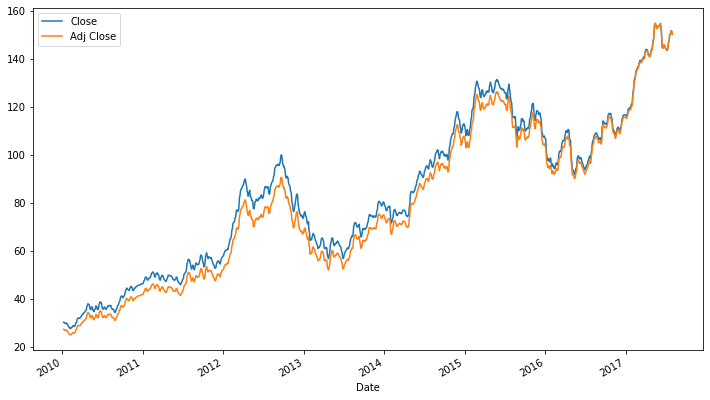

In [196]:
#ejemplo 84
bog.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

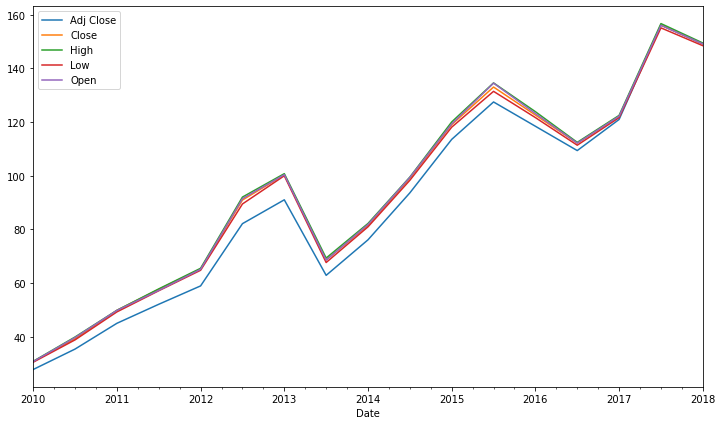

In [199]:
#ejemplo 85
# Drop `Volume`, since it's way bigger than everything else.
bog.drop('Volume', axis=1).resample('6M').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

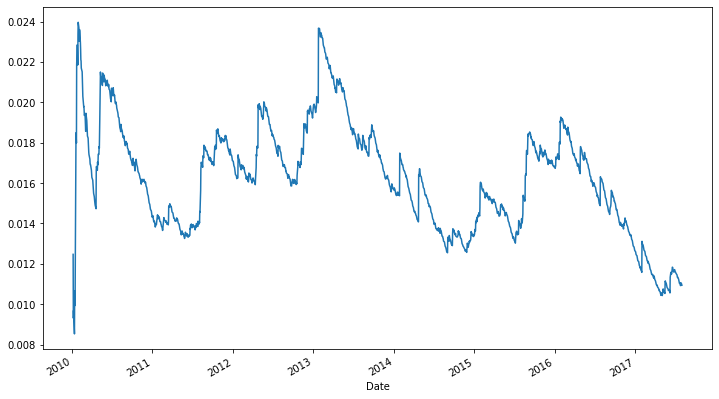

In [202]:
#ejemplo 86
# 30-day rolling exponentially-weighted stddev of returns.
bog['Close'].pct_change().ewm(span=180 ).std().plot();

# "Real World" Data

In [230]:
import avocados


In [233]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

ModuleNotFoundError: ignored

In [235]:
#ejemplo 87
from avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [236]:
#ejemplo 88
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

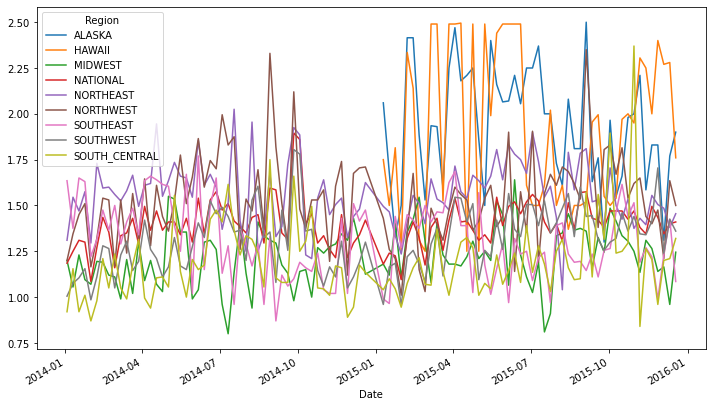

In [237]:
#ejemplo 89
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [238]:
#ejemplo 90
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

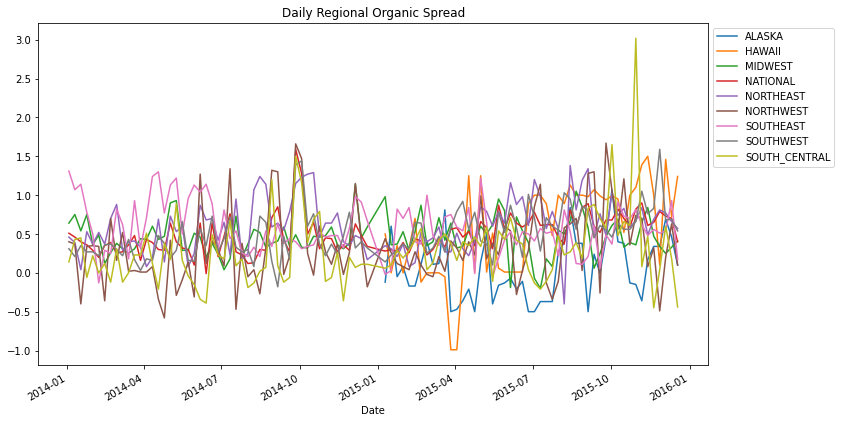

In [239]:
#ejemplo 91
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [240]:
#ejemplo 92
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

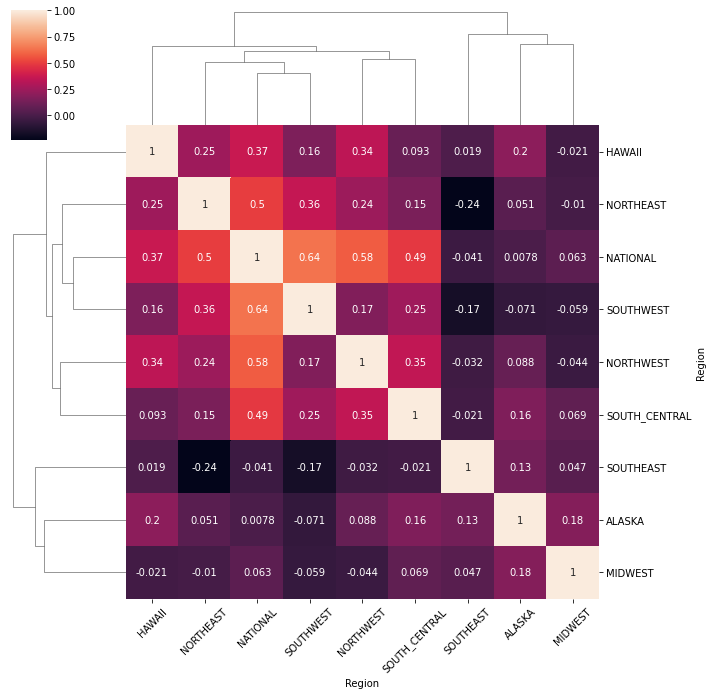

In [241]:
#ejemplo 93
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!